In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"


In [3]:
# Charger les données depuis l'URL dans un DataFrame
df = pd.read_csv(URL)

# Afficher les premières lignes du dataset
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [4]:
df.dtypes

Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

In [5]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [6]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

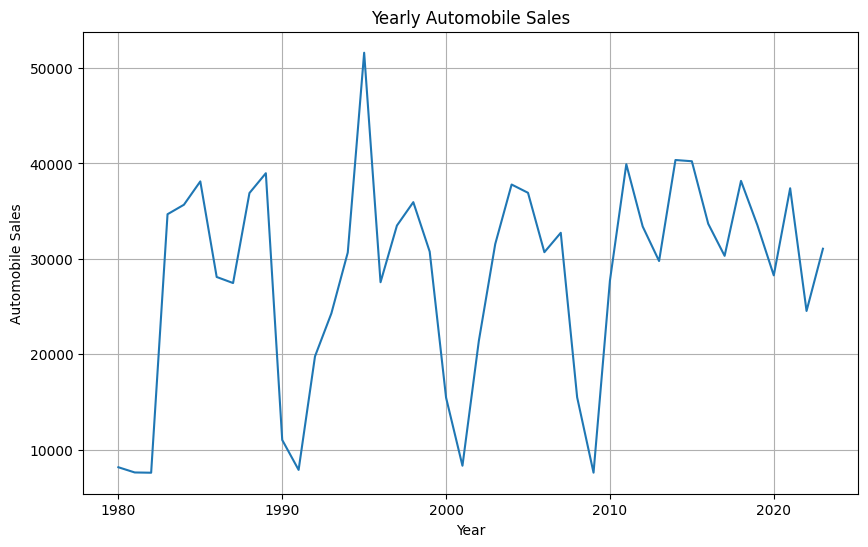

In [7]:
# Group the data by year and sum the automobile sales for each year
sales_by_year = df.groupby('Year')['Automobile_Sales'].sum()

# Plot the line chart
sales_by_year.plot(kind='line', title='Yearly Automobile Sales', xlabel='Year', ylabel='Automobile Sales', figsize=(10, 6))
plt.grid()
plt.show()

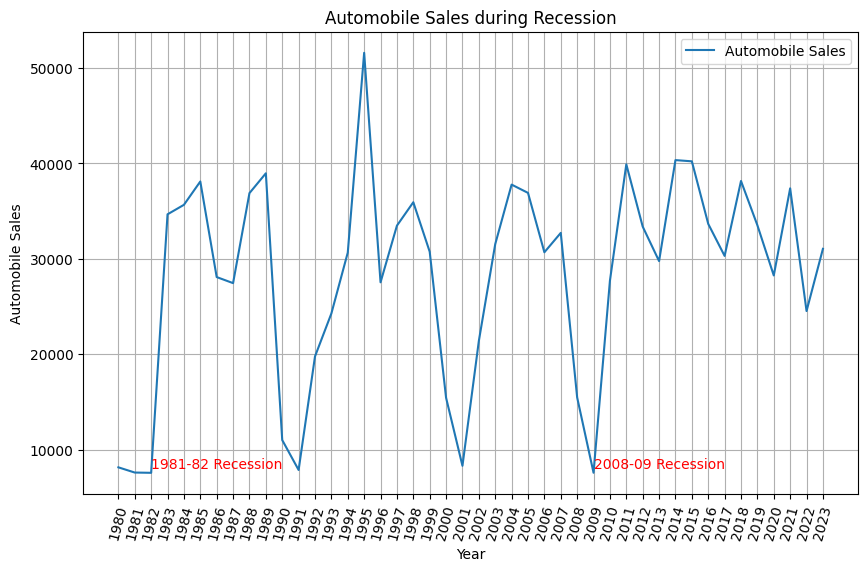

In [8]:
plt.figure(figsize=(10, 6))
sales_by_year.plot(kind='line', label='Automobile Sales')

# Set x-ticks for all years from 1980 to 2023
plt.xticks(list(range(1980, 2024)), rotation=75)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales during Recession')

# Add annotations for recession years
plt.text(1982, 8000, '1981-82 Recession', color='red')
plt.text(2009, 8000, '2008-09 Recession', color='red')

# Add grid and legend
plt.grid()
plt.legend()
plt.show()

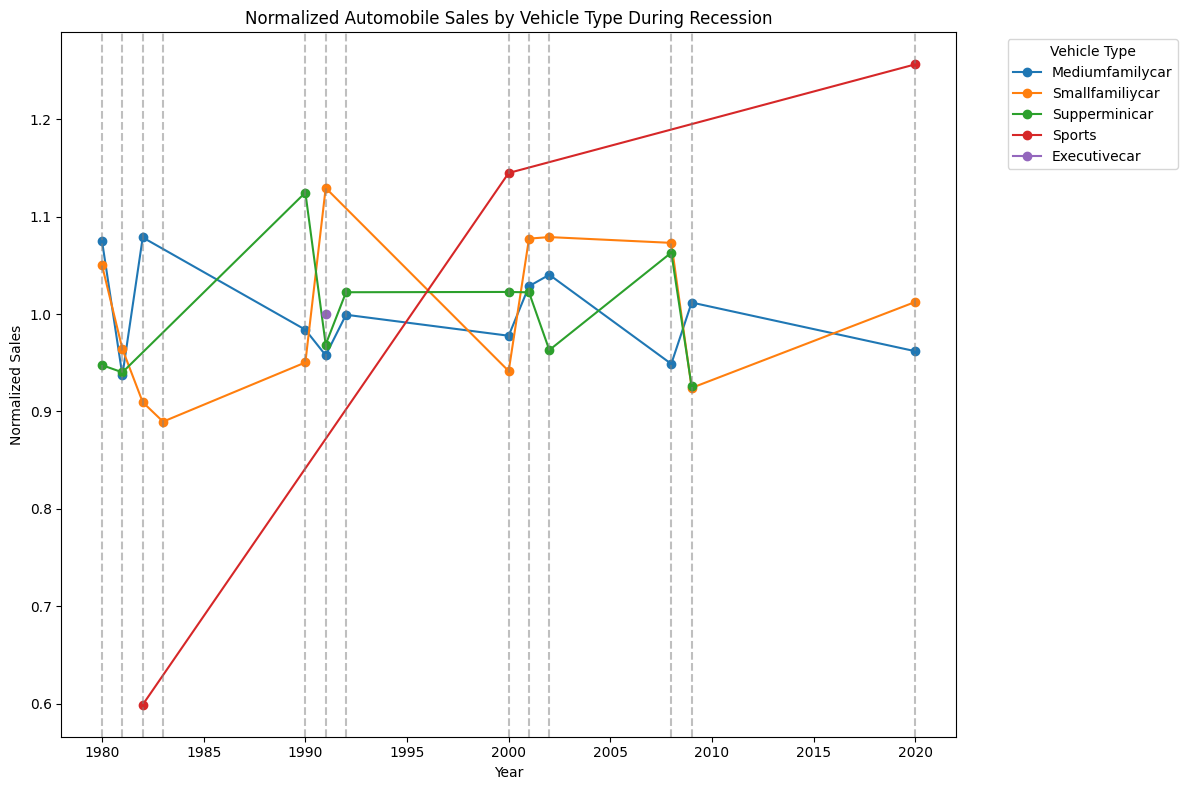

In [11]:
# Filter the data for recession period
df_rec = df[df['Recession'] == 1]

# Calculate the average automobile sales by year and vehicle type during the recession
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Calculate the normalized sales by dividing by the average sales for each vehicle type
df_Mline['Normalized_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())

# Set the 'Year' as the index
df_Mline.set_index('Year', inplace=True)

# Create the plot for each vehicle type
plt.figure(figsize=(12, 8))
for vehicle_type in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], label=vehicle_type, marker='o')

# Highlight recession years
recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

# Add labels, legend, and title
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized Sales")
plt.xlabel("Year")
plt.title("Normalized Automobile Sales by Vehicle Type During Recession")

# Show the plot
plt.tight_layout()
plt.show()

### Analyse précise du graphique

1. **Tendances générales** :
    - Les ventes d'automobiles montrent des fluctuations significatives au fil des années.
    - Les périodes de récession sont clairement identifiables par des baisses marquées des ventes.

2. **Impact des récessions** :
    - Les années de récession, comme 1981-82, 2008-09 et 2020, sont associées à des baisses importantes des ventes.
    - Cela reflète une corrélation entre les conditions économiques difficiles et la baisse de la demande automobile.

3. **Reprises économiques** :
    - Après chaque récession, une reprise des ventes est observée, bien que l'ampleur et la rapidité de cette reprise varient.
    - Par exemple, après la récession de 2008-09, les ventes ont progressivement augmenté jusqu'en 2015.

4. **Tendances récentes** :
    - Les ventes semblent avoir atteint un plateau ou une légère baisse dans les années récentes.
    - Cela pourrait être dû à des facteurs comme la saturation du marché, les changements dans les préférences des consommateurs (ex. : véhicules électriques), ou encore les impacts de la pandémie.

5. **Analyse par type de véhicule** :
    - Les ventes de certains types de véhicules, comme les "Smallfamilycar" et "Mediumfamilycar", restent relativement stables, même pendant les récessions.
    - Les véhicules de niche, comme les "Sports" ou "Executivecar", montrent des variations plus importantes, reflétant leur sensibilité aux conditions économiques.

### Conclusions

- **Corrélation économique** : Les ventes d'automobiles sont fortement influencées par les cycles économiques. Les récessions entraînent des baisses marquées, tandis que les périodes de croissance favorisent une reprise.
- **Opportunités stratégiques** : Les constructeurs automobiles pourraient se concentrer sur les segments stables (ex. : "Smallfamilycar") pour atténuer les impacts des récessions.
- **Adaptation aux tendances** : L'évolution des préférences des consommateurs (ex. : véhicules électriques, durabilité) et les facteurs externes (ex. : pandémie) nécessitent une adaptation continue des stratégies de production et de marketing.
- **Prévisions et planification** : Une analyse approfondie des données économiques (ex. : taux de chômage, PIB) pourrait aider à prévoir les tendances futures et à mieux planifier les stratégies commerciales.


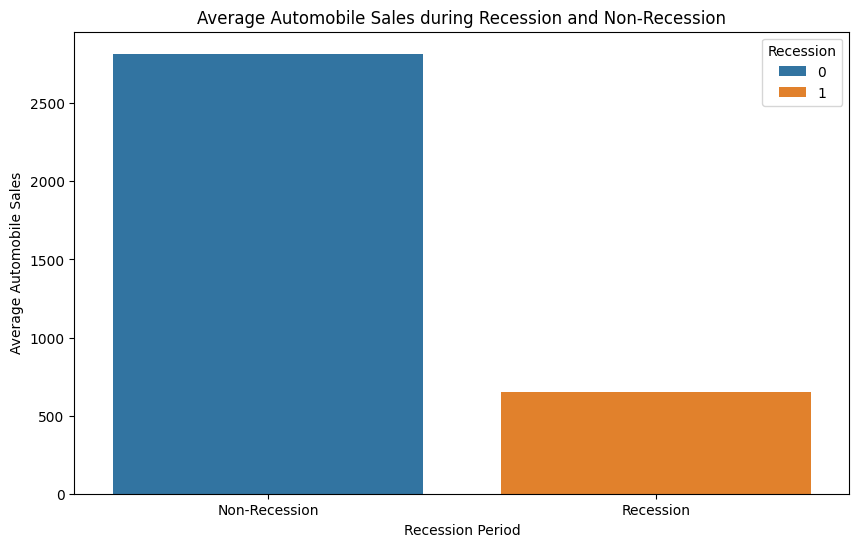

In [ ]:
# Group the data by 'Recession' and calculate the mean of 'Automobile_Sales'
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=new_df)
plt.xlabel('Recession Period')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

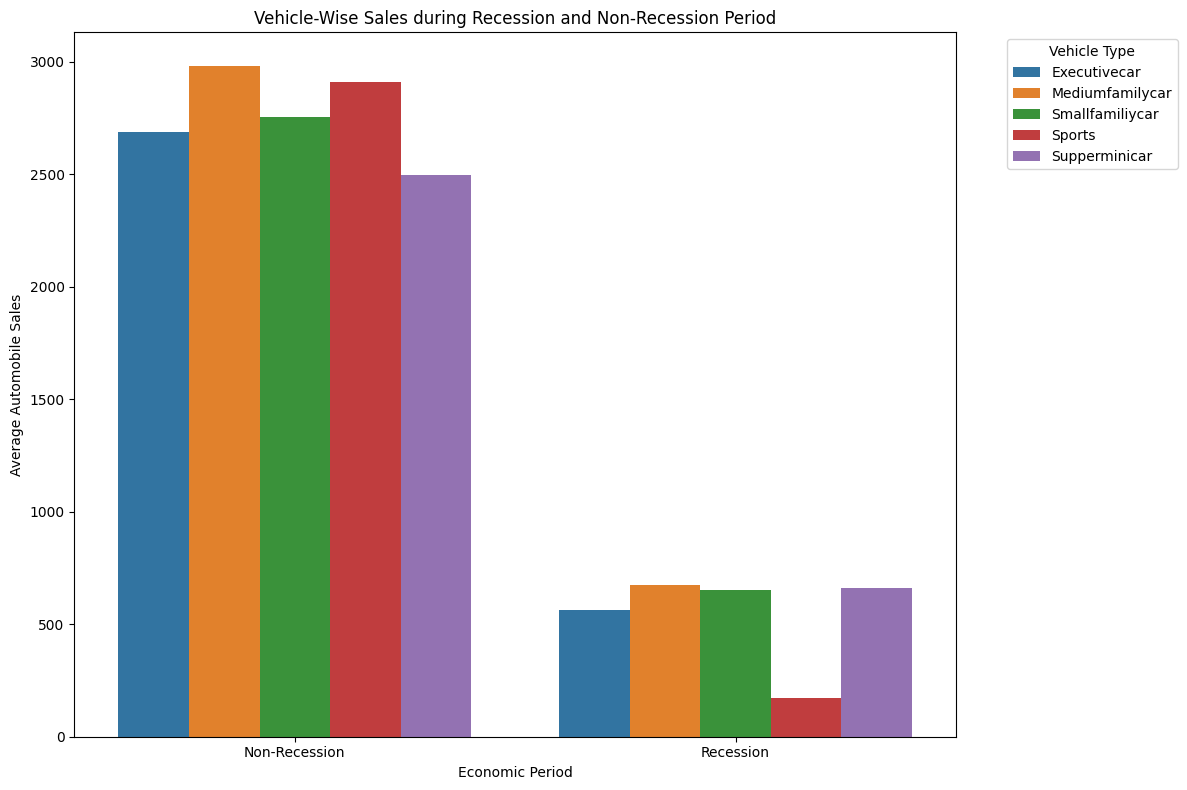

In [ ]:
# Group the data by 'Recession' and 'Vehicle_Type' for average 'Automobile_Sales'
grouped_data = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=grouped_data)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Economic Period')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

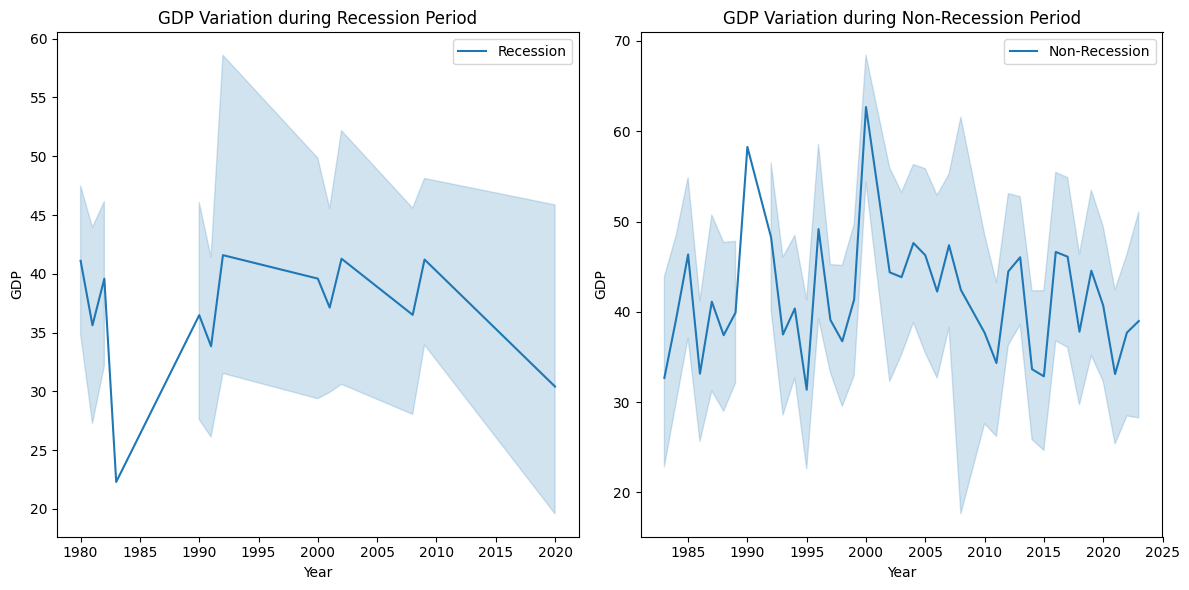

In [ ]:
# Create dataframes for recession and non-recession periods
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Create a figure
fig = plt.figure(figsize=(12, 6))

# Create different axes for subplots
ax0 = fig.add_subplot(1, 2, 1)  # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2)  # add subplot 2 (1 row, 2 columns, second plot)

# Plot GDP variation during recession period
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

# Plot GDP variation during non-recession period
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

# Adjust layout
plt.tight_layout()
plt.show()

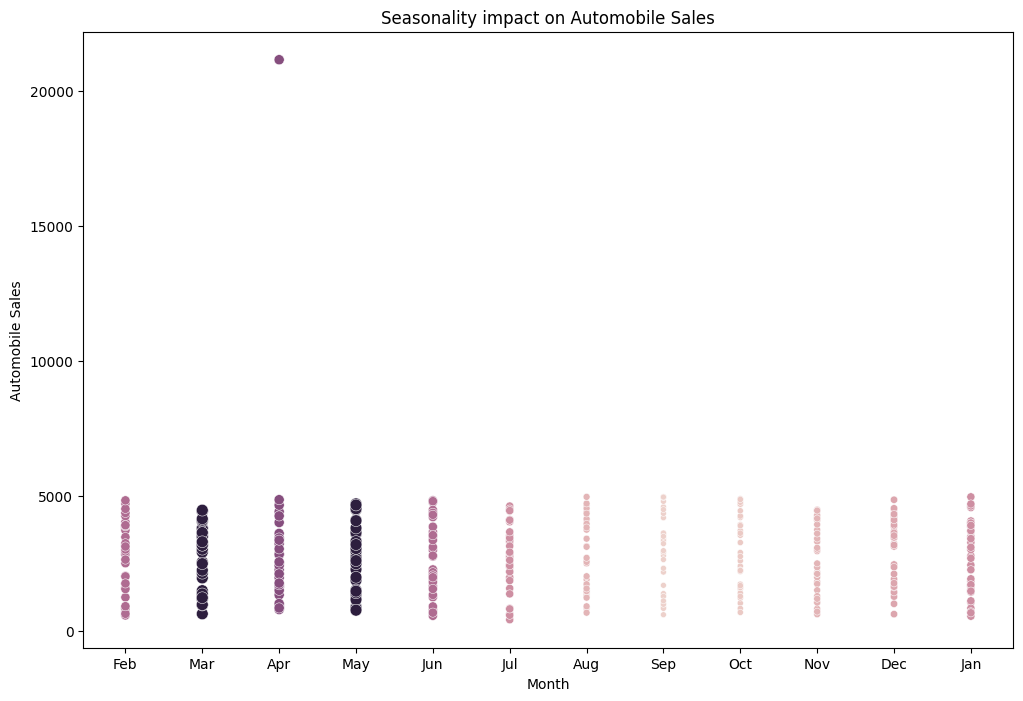

In [ ]:
# Filter data for non-recession years
non_rec_data = df[df['Recession'] == 0]

# Create a Bubble plot
plt.figure(figsize=(12, 8))
size = non_rec_data['Seasonality_Weight']  # for bubble effect

sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight', legend=False)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality impact on Automobile Sales')

# Show the plot
plt.show()

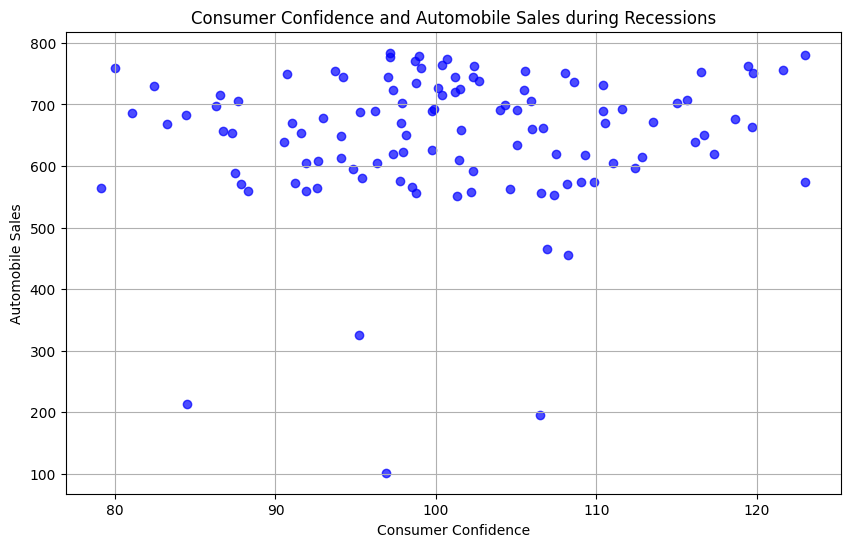

In [ ]:
# Create a dataframe for recession period
rec_data = df[df['Recession'] == 1]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'], alpha=0.7, color='blue')

# Add labels and title
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')

# Show the plot
plt.grid()
plt.show()

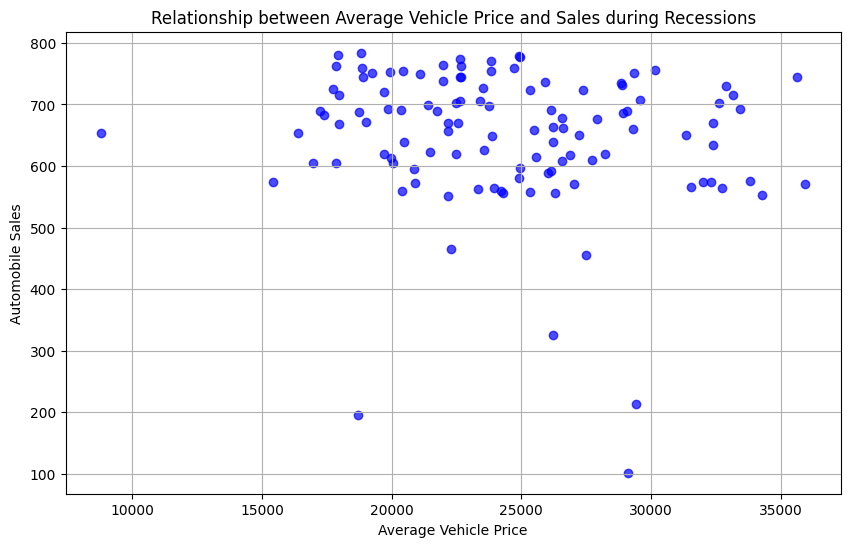

In [ ]:
# Create dataframes for recession period
recession_data = df[df['Recession'] == 1]

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(recession_data['Price'], recession_data['Automobile_Sales'], alpha=0.7, color='blue')

# Add labels and title
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')

# Show the plot
plt.grid()
plt.show()

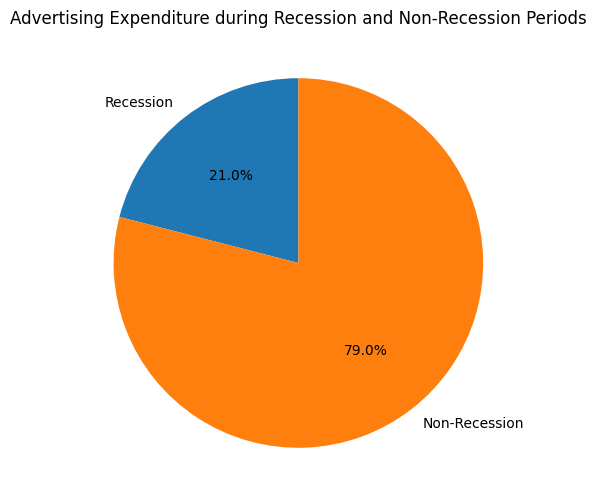

In [ ]:
# Filter the data 
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()

### Aperçus sur les Dépenses Publicitaires pendant les Périodes de Récession et de Non-Récession

1. **Proportion des Dépenses** :
    - Les dépenses publicitaires pendant les périodes de non-récession (`NRAtotal`) sont nettement plus élevées que pendant les périodes de récession (`RAtotal`).
    - Le graphique en secteurs montre que les périodes de non-récession représentent environ **79 %** des dépenses publicitaires totales, tandis que les périodes de récession n'en représentent que **21 %**.

2. **Stratégie Économique** :
    - Les entreprises ont tendance à réduire leurs dépenses publicitaires pendant les périodes de récession, probablement en raison de contraintes budgétaires et d'une demande réduite des consommateurs.
    - Pendant les périodes de non-récession, des dépenses plus élevées reflètent des stratégies marketing agressives visant à capter des parts de marché et à augmenter les ventes.

3. **Impact sur les Ventes** :
    - La réduction des dépenses publicitaires pendant les récessions pourrait contribuer à la baisse des ventes automobiles observée durant ces périodes.
    - À l'inverse, l'augmentation des dépenses pendant les périodes de non-récession est en corrélation avec des ventes plus élevées, ce qui indique l'efficacité de la publicité pour stimuler la demande.

4. **Implications Stratégiques** :
    - Les entreprises pourraient explorer des stratégies publicitaires rentables pendant les récessions afin de maintenir leur visibilité sans dépasser leur budget.
    - Investir dans des campagnes ciblées pendant les périodes de non-récession peut maximiser les retours sur investissement et renforcer la présence de la marque.

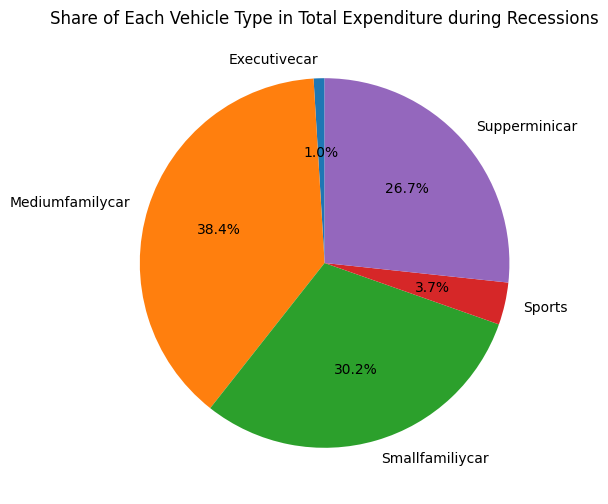

In [ ]:
# Filter the data 
Rdata = df[df['Recession'] == 1]

# Calculate the advertisement expenditure by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions')

plt.show()

C:\Users\yohar\AppData\Local\Temp\ipykernel_54644\320803119.py:6: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',


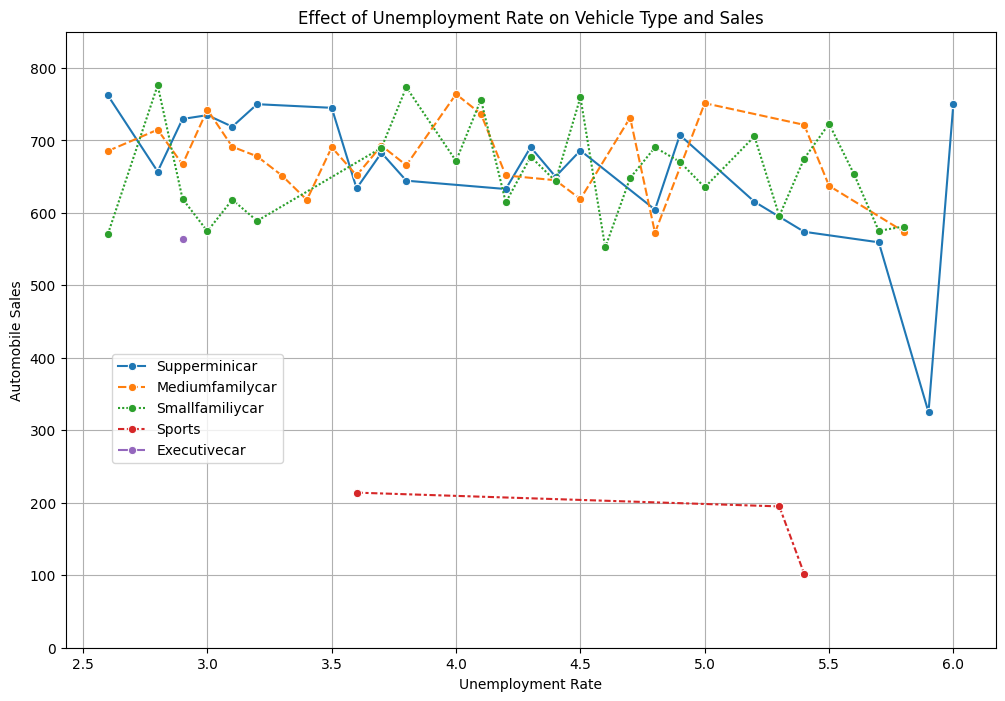

In [ ]:
# Filter out the data for the recession period
df_rec = df[df['Recession'] == 1]

# Create the lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)

# Set plot limits, title, and legend
plt.ylim(0, 850)
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.legend(loc=(0.05, 0.3))
plt.grid()
plt.show()

Voici les insights obtenus sur les ventes des **Supperminicar**, **Smallfamilycar** et **Mediumfamilycar** :

1. **Tendances générales** :
    - Les ventes des **Supperminicar** et **Smallfamilycar** montrent une certaine stabilité au fil des années, même pendant les périodes de récession.
    - Les **Mediumfamilycar** affichent des fluctuations plus importantes, mais restent globalement résilientes.

2. **Impact des récessions** :
    - Pendant les périodes de récession, les ventes des **Smallfamilycar** et **Supperminicar** diminuent légèrement, mais elles restent relativement stables par rapport à d'autres types de véhicules.
    - Les **Mediumfamilycar** semblent plus sensibles aux conditions économiques, avec des baisses plus marquées pendant les récessions.

3. **Reprises économiques** :
    - Après les récessions, les ventes des trois types de véhicules montrent une reprise progressive, bien que l'ampleur de cette reprise varie selon le type de véhicule.

4. **Préférences des consommateurs** :
    - Les **Smallfamilycar** restent un choix populaire, probablement en raison de leur polyvalence et de leur coût abordable.
    - Les **Supperminicar** attirent les consommateurs à la recherche de véhicules compacts et économiques.
    - Les **Mediumfamilycar** sont souvent privilégiées par les familles, mais leur sensibilité aux récessions pourrait refléter leur coût plus élevé.

En résumé, les **Smallfamilycar** et **Supperminicar** sont des segments relativement stables, tandis que les **Mediumfamilycar** sont plus sensibles aux cycles économiques.

In [20]:
import json
import requests

# Load the GeoJSON file
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'

response = requests.get(path)
if response.status_code == 200:
    us_states = response.json()
else:
    raise Exception(f"Failed to fetch GeoJSON file. HTTP Status Code: {response.status_code}")

# Group the recession data by state (City column) and sum the sales
state_sales = df_rec.groupby('City')['Automobile_Sales'].sum().reset_index()

# Find the state with the highest sales
highest_sales_state = state_sales.loc[state_sales['Automobile_Sales'].idxmax()]

# Create a folium map centered on the highest sales state
m = folium.Map(location=[37.8, -96], zoom_start=4)

# Add a choropleth layer to the map
folium.Choropleth(
    geo_data=us_states,
    name="choropleth",
    data=state_sales,
    columns=["City", "Automobile_Sales"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Automobile Sales",
).add_to(m)

# Add a marker for the highest sales state
folium.Marker(
    location=[37.8, -96],  # Replace with actual coordinates of the state
    popup=f"Highest Sales: {highest_sales_state['City']} ({highest_sales_state['Automobile_Sales']})",
    icon=folium.Icon(color="red"),
).add_to(m)

# Display the map
m

In [22]:
# Group the recession data by city and sum the automobile sales
city_sales = rec_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a folium map centered on the United States
choropleth_map = folium.Map(location=[37.8, -96], zoom_start=4)

# Add a choropleth layer to the map
folium.Choropleth(
    geo_data=us_states,
    name="choropleth",
    data=city_sales,
    columns=["City", "Automobile_Sales"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Automobile Sales during Recession",
).add_to(choropleth_map)

# Add markers for each city
for _, row in city_sales.iterrows():
    folium.Marker(
        location=[37.8, -96],  # Replace with actual coordinates for each city
        popup=f"{row['City']}: {row['Automobile_Sales']}",
        icon=folium.Icon(color="blue"),
    ).add_to(choropleth_map)

# Display the map
choropleth_map

NameError: name 'rec_data' is not defined

In [ ]:
    # Filter the data for the recession period and specific cities
recession_data = df[df['Recession'] == 1]

    # Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

    # Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

    # Create a choropleth layer using Folium
choropleth = folium.Choropleth(
        geo_data= path,  # GeoJSON file with state boundaries
        data=sales_by_city,
        columns=['City', 'Automobile_Sales'],
        key_on='feature.properties.name',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Automobile Sales during Recession'
    ).add_to(map1)


    # Add tooltips to the choropleth layer
choropleth.geojson.add_child(
        folium.features.GeoJsonTooltip(['name'], labels=True)
    )

    # Display the map
map1

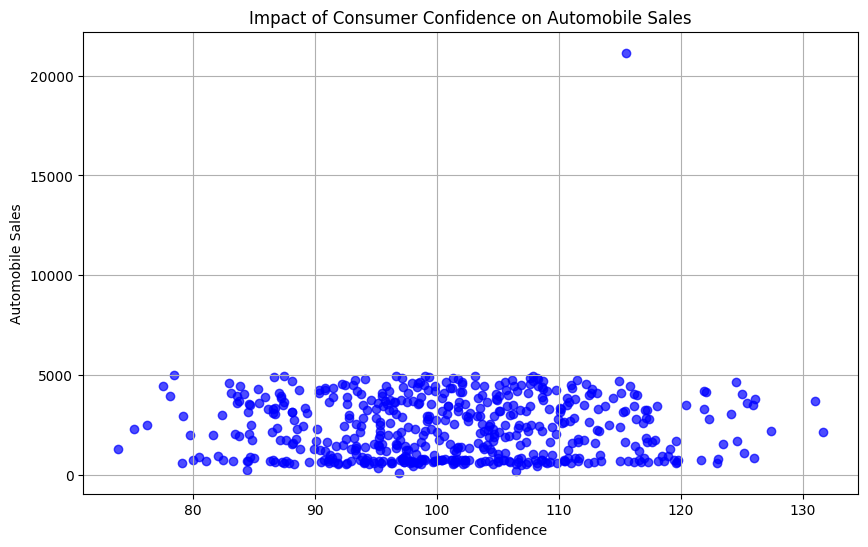

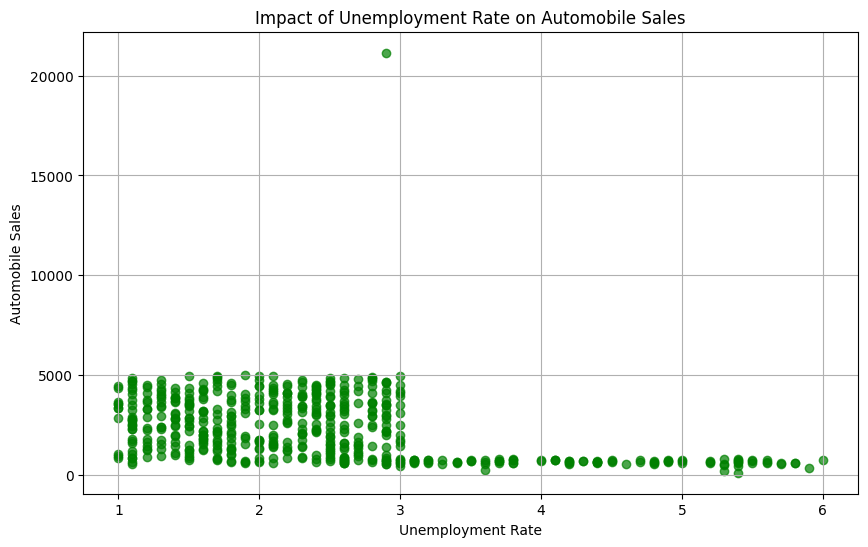

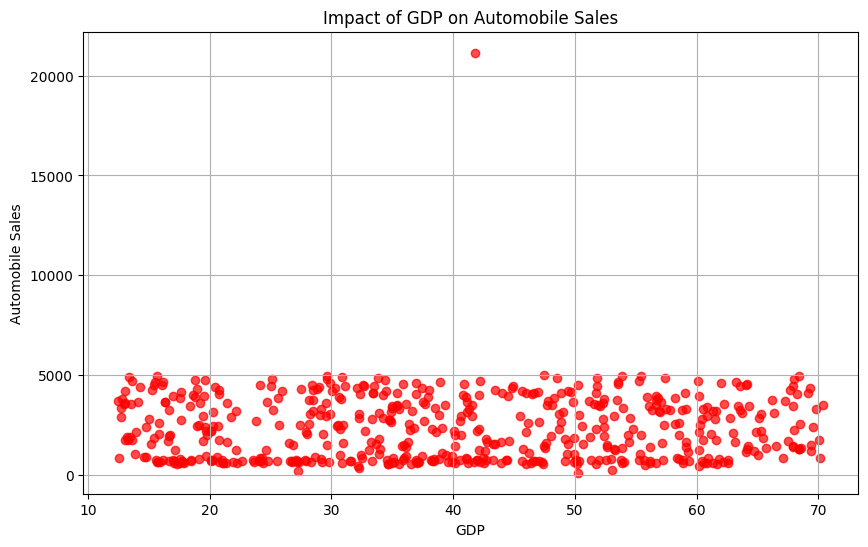

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Consumer_Confidence'], df['Automobile_Sales'], alpha=0.7, color='blue')
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Impact of Consumer Confidence on Automobile Sales')
plt.grid()
plt.show()

    # Scatter plot pour le taux de chômage
plt.figure(figsize=(10, 6))
plt.scatter(df['unemployment_rate'], df['Automobile_Sales'], alpha=0.7, color='green')
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.title('Impact of Unemployment Rate on Automobile Sales')
plt.grid()
plt.show()

    # Scatter plot pour le PIB
plt.figure(figsize=(10, 6))
plt.scatter(df['GDP'], df['Automobile_Sales'], alpha=0.7, color='red')
plt.xlabel('GDP')
plt.ylabel('Automobile Sales')
plt.title('Impact of GDP on Automobile Sales')
plt.grid()
plt.show()

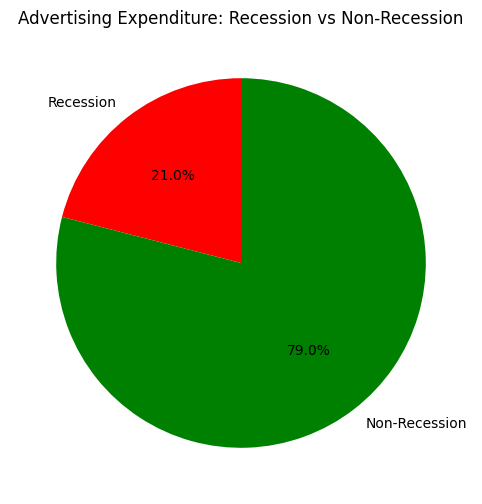

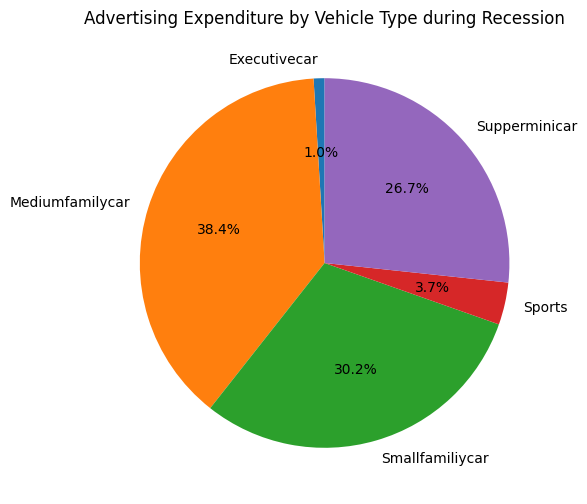

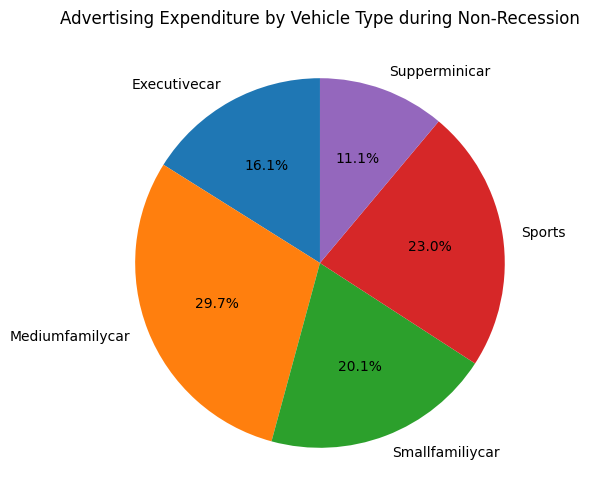

In [15]:
# Calculer les dépenses publicitaires totales pour les périodes de récession et de non-récession
recession_ad_exp = df_rec['Advertising_Expenditure'].sum()
non_recession_ad_exp = df[df['Recession'] == 0]['Advertising_Expenditure'].sum()

# Créer un graphique en secteurs pour comparer les dépenses publicitaires
plt.figure(figsize=(8, 6))
labels = ['Recession', 'Non-Recession']
sizes = [recession_ad_exp, non_recession_ad_exp]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Advertising Expenditure: Recession vs Non-Recession')
plt.show()

# Calculer les dépenses publicitaires par type de véhicule pendant les périodes de récession
ad_exp_by_vehicle_recession = df_rec.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Créer un graphique en secteurs pour visualiser la répartition des dépenses par type de véhicule (récession)
plt.figure(figsize=(8, 6))
labels = ad_exp_by_vehicle_recession.index
sizes = ad_exp_by_vehicle_recession.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure by Vehicle Type during Recession')
plt.show()

# Calculer les dépenses publicitaires par type de véhicule pendant les périodes de non-récession
ad_exp_by_vehicle_non_recession = df[df['Recession'] == 0].groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Créer un graphique en secteurs pour visualiser la répartition des dépenses par type de véhicule (non-récession)
plt.figure(figsize=(8, 6))
labels = ad_exp_by_vehicle_non_recession.index
sizes = ad_exp_by_vehicle_non_recession.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure by Vehicle Type during Non-Recession')
plt.show()

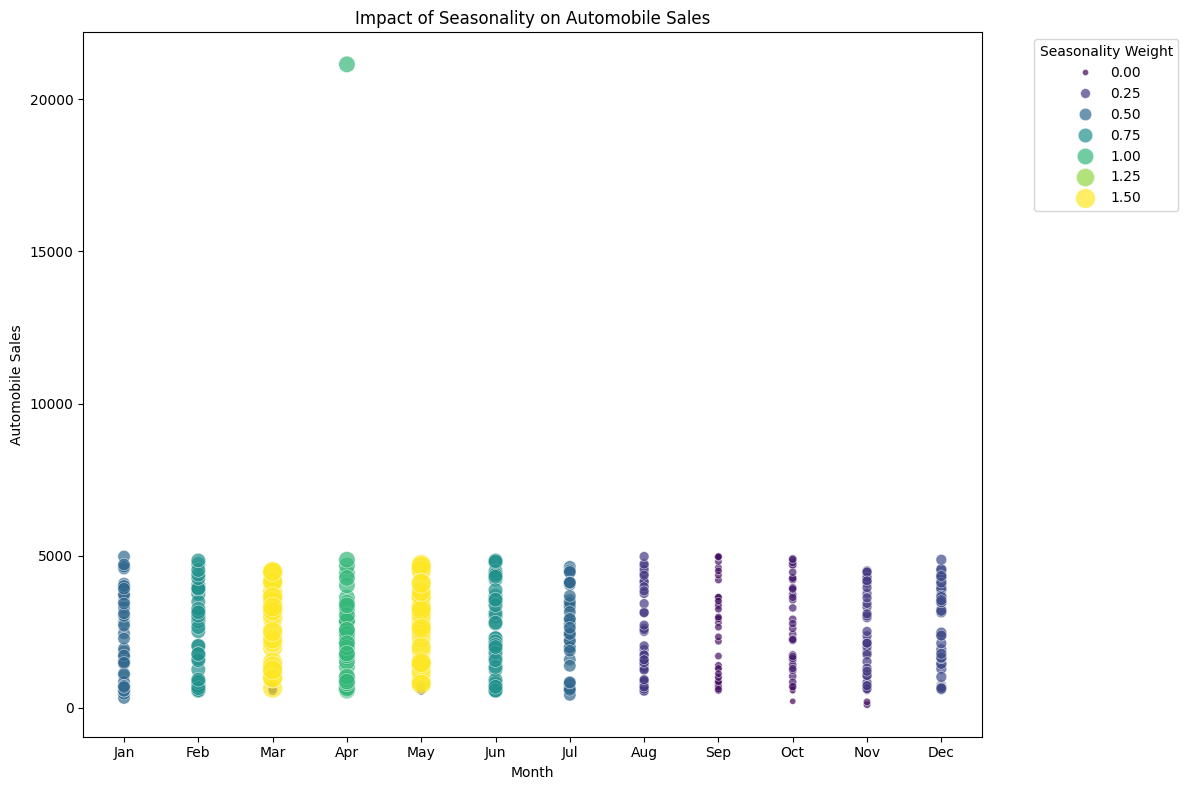

In [21]:
# Create a bubble plot to analyze seasonality impact on automobile sales
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Month',
    y='Automobile_Sales',
    size='Seasonality_Weight',
    hue='Seasonality_Weight',
    sizes=(20, 200),
    alpha=0.7,
    palette='viridis'
)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Impact of Seasonality on Automobile Sales')

# Show the plot
plt.legend(title='Seasonality Weight', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()